In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [3]:
# make sure pandas is version 1.0 or higher
# make sure networkx is verion 2.4 or higher
print(pd.__version__)
print(nx.__version__)

1.5.3
3.0


In [4]:
from ema_workbench import (
    Model,
    Policy,
    ema_logging,
    SequentialEvaluator,
    MultiprocessingEvaluator,
)
from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation import get_model_for_problem_formulation, sum_over, sum_over_time



In [5]:
ema_logging.log_to_stderr(ema_logging.INFO)

# choose problem formulation number, between 0-5
# each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(0)

In [6]:
# enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
import copy

for unc in dike_model.uncertainties:
    print(repr(unc))

uncertainties = copy.deepcopy(dike_model.uncertainties)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132, resolution=None, default=None, variable_name=['A.0_ID flood wave shape'], pff=False)
RealParameter('A.1_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.1_Bmax'], pff=False)
RealParameter('A.1_pfail', 0, 1, resolution=None, default=None, variable_name=['A.1_pfail'], pff=False)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.2_Bmax'], pff=False)
RealParameter('A.2_pfail', 0, 1, resolution=None, default=None, variable_name=['A.2_pfail'], pff=False)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.3_Bmax'], pff=False)
RealParameter('A.3_pfail', 0, 1, resolution=None, default=None, variable_name=['A.3_pfai

In [52]:
# enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))

levers = copy.deepcopy(dike_model.levers)

IntegerParameter('0_RfR 0', 0, 1, resolution=None, default=None, variable_name=['0_RfR 0'], pff=False)
IntegerParameter('0_RfR 1', 0, 1, resolution=None, default=None, variable_name=['0_RfR 1'], pff=False)
IntegerParameter('0_RfR 2', 0, 1, resolution=None, default=None, variable_name=['0_RfR 2'], pff=False)
IntegerParameter('1_RfR 0', 0, 1, resolution=None, default=None, variable_name=['1_RfR 0'], pff=False)
IntegerParameter('1_RfR 1', 0, 1, resolution=None, default=None, variable_name=['1_RfR 1'], pff=False)
IntegerParameter('1_RfR 2', 0, 1, resolution=None, default=None, variable_name=['1_RfR 2'], pff=False)
IntegerParameter('2_RfR 0', 0, 1, resolution=None, default=None, variable_name=['2_RfR 0'], pff=False)
IntegerParameter('2_RfR 1', 0, 1, resolution=None, default=None, variable_name=['2_RfR 1'], pff=False)
IntegerParameter('2_RfR 2', 0, 1, resolution=None, default=None, variable_name=['2_RfR 2'], pff=False)
IntegerParameter('3_RfR 0', 0, 1, resolution=None, default=None, variable

In [53]:
# enlisting outcomes
for outcome in dike_model.outcomes:
    print(repr(outcome))

ScalarOutcome('All Costs', variable_name=('A.1_Expected Annual Damage', 'A.2_Expected Annual Damage', 'A.3_Expected Annual Damage', 'A.4_Expected Annual Damage', 'A.5_Expected Annual Damage', 'A.1_Dike Investment Costs', 'A.2_Dike Investment Costs', 'A.3_Dike Investment Costs', 'A.4_Dike Investment Costs', 'A.5_Dike Investment Costs', 'RfR Total Costs', 'Expected Evacuation Costs'), function=<function sum_over at 0x000001A9F2F0F9C0>)
ScalarOutcome('Expected Number of Deaths', variable_name=('A.1_Expected Number of Deaths', 'A.2_Expected Number of Deaths', 'A.3_Expected Number of Deaths', 'A.4_Expected Number of Deaths', 'A.5_Expected Number of Deaths'), function=<function sum_over at 0x000001A9F2F0F9C0>)


In [7]:
# running the model through EMA workbench
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=50, policies=4)

KeyboardInterrupt: 

In [8]:
# observing the simulation runs
experiments, outcomes = results
print(outcomes.keys())
experiments

NameError: name 'results' is not defined

In [56]:
# only works because we have scalar outcomes
pd.DataFrame(outcomes)

,All Costs,Expected Number of Deaths
0,1.620381e+09,0.002782
1,1.610259e+09,0.000299
2,1.609983e+09,0.000108
3,1.609302e+09,0.000000
4,1.609302e+09,0.000000
...,...,...
195,1.929281e+09,0.002384
196,1.909418e+09,0.000630
197,1.908311e+09,0.000185
198,1.920369e+09,0.001897


In [9]:
# defining specific policies
# for example,
# Policy 0 is a "do nothing" policy
# policy 1 is about extra protection in upper boundary
# policy 2 is about extra protection in lower boundary
# policy 3 is extra protection in random locations
# policy 4 is performing all room for the river projects in first timestep
# Policy 5 is raising all dike-rings with 5 dm


def get_do_nothing_dict():
    return {l.name: 0 for l in dike_model.levers}


policies = [
    Policy(
        "policy 0",
        **dict(
            get_do_nothing_dict(),
            **{}
        )
    ),
    Policy(
        "policy 1",
        **dict(
            get_do_nothing_dict(),
            **{"0_RfR 0": 1, "0_RfR 1": 1, "0_RfR 2": 1, "A.1_DikeIncrease 0": 5}
        )
    ),
    Policy(
        "policy 2",
        **dict(
            get_do_nothing_dict(),
            **{"4_RfR 0": 1, "4_RfR 1": 1, "4_RfR 2": 1, "A.5_DikeIncrease 0": 5}
        )
    ),
    Policy(
        "policy 3",
        **dict(
            get_do_nothing_dict(),
            **{"1_RfR 0": 1, "2_RfR 1": 1, "3_RfR 2": 1, "A.3_DikeIncrease 0": 5}
        )
    ),

        Policy(
        "policy 4",
        **dict(
            get_do_nothing_dict(),
            **{"0_RfR 0": 1, "1_RfR 0": 1, "2_RfR 0": 1, "3_RfR 0": 1,"4_RfR 0": 1}
        )
    ),
        Policy(
        "policy 5",
        **dict(
            get_do_nothing_dict(),
            **{"A.1_DikeIncrease 0":5,"A.2_DikeIncrease 0":5,"A.3_DikeIncrease 0":5,"A.4_DikeIncrease 0":5,"A.5_DikeIncrease 0":5}
        )
    ),
]

In [10]:
# pass the policies list to EMA workbench experiment runs
n_scenarios = 100
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios, policies)

[MainProcess/INFO] pool started with 8 workers
[MainProcess/INFO] performing 100 scenarios * 6 policies * 1 model(s) = 600 experiments
100%|████████████████████████████████████████| 600/600 [01:25<00:00,  7.05it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [11]:
experiments, outcomes = results

In [12]:
# only works because we have scalar outcomes
pd.DataFrame(outcomes)

,All Costs,Expected Number of Deaths
0,2.516829e+09,3.575965
1,3.863861e+08,0.387173
2,2.319435e+09,1.252533
3,7.659307e+08,0.735013
4,1.026413e+08,0.168504
...,...,...
595,2.015968e+08,0.013719
596,2.965260e+08,0.107844
597,3.094455e+08,0.104348
598,6.558558e+08,0.357632


In [13]:
experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,53,293.419272,1.0,0.594940,250.439344,1.5,0.210824,309.891944,1.0,0.163607,...,0,0,0,0,0,0,0,0,policy 0,dikesnet
1,35,76.096358,1.5,0.614143,339.533580,1.5,0.654695,316.631849,1.5,0.629622,...,0,0,0,0,0,0,0,1,policy 0,dikesnet
2,57,149.673850,1.0,0.374488,121.731922,10.0,0.409015,198.115089,1.5,0.814066,...,0,0,0,0,0,0,0,2,policy 0,dikesnet
3,56,198.431017,10.0,0.523135,179.731922,1.0,0.155087,137.622805,1.5,0.968851,...,0,0,0,0,0,0,0,3,policy 0,dikesnet
4,90,303.417364,10.0,0.919782,222.889530,1.5,0.613626,35.765750,10.0,0.662970,...,0,0,0,0,0,0,0,4,policy 0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,46,329.045285,1.5,0.150601,244.096651,10.0,0.140731,339.313350,1.0,0.429546,...,0,5,0,0,5,0,0,95,policy 5,dikesnet
596,87,133.643593,1.0,0.305380,111.492580,1.5,0.295663,235.148956,1.0,0.446836,...,0,5,0,0,5,0,0,96,policy 5,dikesnet
597,82,206.319316,10.0,0.430827,185.437350,10.0,0.392828,201.942861,10.0,0.830809,...,0,5,0,0,5,0,0,97,policy 5,dikesnet
598,66,254.988226,1.0,0.263850,335.525651,1.5,0.496527,140.803370,1.5,0.412556,...,0,5,0,0,5,0,0,98,policy 5,dikesnet


In [14]:
policies = experiments['policy']
data = pd.DataFrame.from_dict(outcomes)
data['policy'] = policies

In [15]:
data

,All Costs,Expected Number of Deaths,policy
0,2.516829e+09,3.575965,policy 0
1,3.863861e+08,0.387173,policy 0
2,2.319435e+09,1.252533,policy 0
3,7.659307e+08,0.735013,policy 0
4,1.026413e+08,0.168504,policy 0
...,...,...,...
595,2.015968e+08,0.013719,policy 5
596,2.965260e+08,0.107844,policy 5
597,3.094455e+08,0.104348,policy 5
598,6.558558e+08,0.357632,policy 5


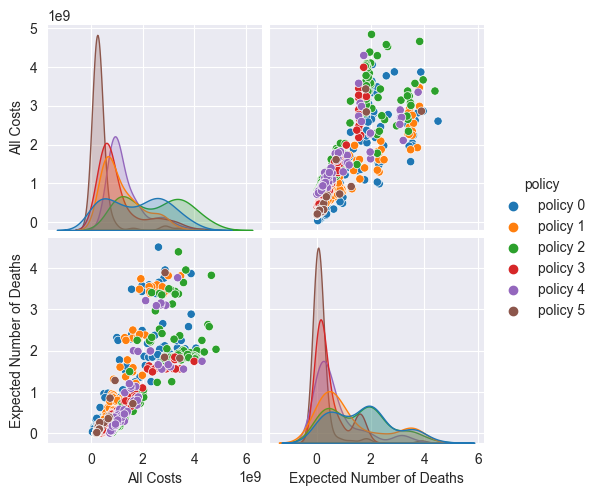

In [16]:
sns.pairplot(data, hue='policy',  vars=outcomes.keys(), )
plt.show()